In [1]:
#Load libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
#Load Dataset
df=pd.read_csv('./train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
# Checking for completeness or the percentage of missing value in each column/features 

In [6]:
df.isnull().sum ()*100 / len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
# Checking for the kinda dataset in each missing column if it's category or not

In [7]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [12]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [14]:
df['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [16]:
# filling up the categorical value with mode except LoanAmount

In [15]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [18]:
# filling this column with median since its not categorical column but median because Q3 − Q2 > Q2 − Q1	(Right-skewed) ----Median

In [16]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [17]:
# Checking for completeness or ensuring the missing columns are complete

In [18]:
df.isnull().sum ()*100 / len(df)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [22]:
# Saving the filled up trained datset

In [19]:
df.to_csv('filled_train.csv', index=False)

In [20]:
# We convert categorical text data to integers because machine learning algorithms can only numerical values

In [21]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Married']=df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [22]:
# replace 3+ in the dependent column with 3, so as the make the column int value as other value in it for other analysis
df['Dependents']=df['Dependents'].replace(to_replace="3+",value='3')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int32  
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 48.1+ KB


In [24]:
# To check if every column is now in numerical value
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


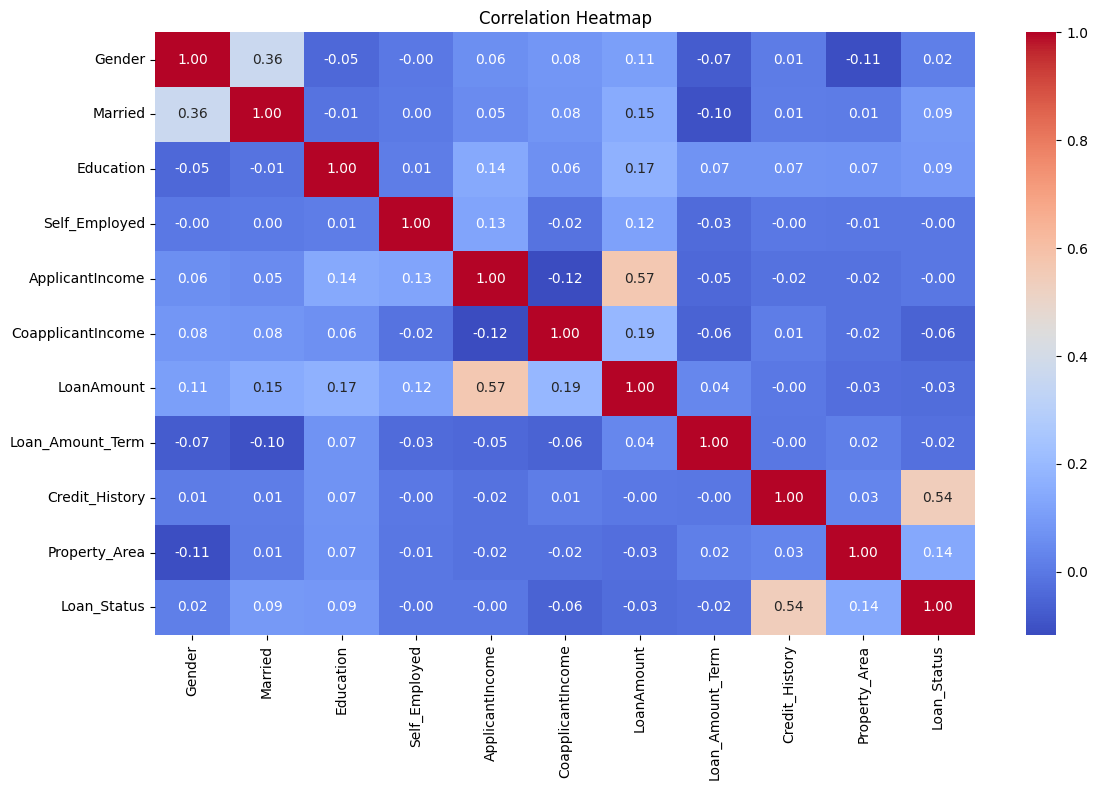

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap of correlation between all numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [30]:
# Data Processing

In [26]:
# Before you perform Data Preprocessing (Smoothing, Feature scalling etc) ensure your X & Y feature (DependenT & Independent)
# are numerical because ML models and preprocessing tools only works on numbers.

# For the reason above that's why i will drop the Loan_ID column
df = df.drop(columns=['Loan_ID'])

In [27]:
# Defining each variables
X= df.drop('Loan_Status', axis=1)
Y= df['Loan_Status']

Before smoothing: Counter({1: 422, 0: 192})


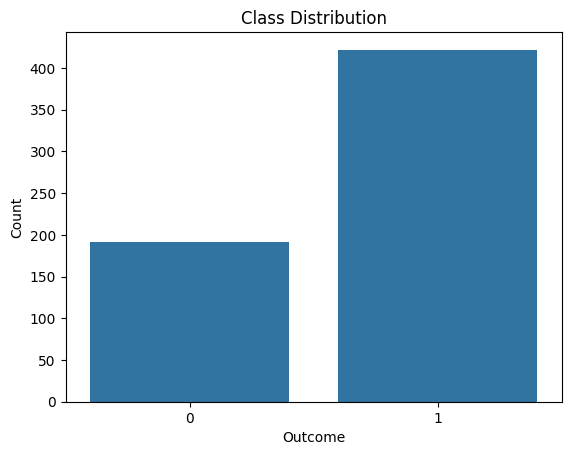

In [28]:
# Check original class distribution, to determine if to smoothe or not

# Define target column
y = df["Loan_Status"]

# This line is required to count
from collections import Counter 
print("Before smoothing:", Counter(y))

# Optional: Visualize the class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

SMOTE

In [ ]:
# Applying smoothing, because of the imbalance, to ensure equal amount of classification in d dependent column for learning to avoid bias model 
# We do smoothing to make all features contribute equally to the model’s learning.

In [40]:
# I need to reinstall/align imblearn with a compatible scikit-learn version to avoid error for some reasons.

In [29]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
# Applying smoothing, because of the imbalance, to ensure equal amount of classification for learning to avoid bias model 

# Step 1: Import libraries
from imblearn.over_sampling import SMOTE
from collections import Counter
import matplotlib.pyplot as plt

# Step 4: Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_smoothed, y_smoothed = smote.fit_resample(X, y)

After smoothing: Counter({1: 422, 0: 422})


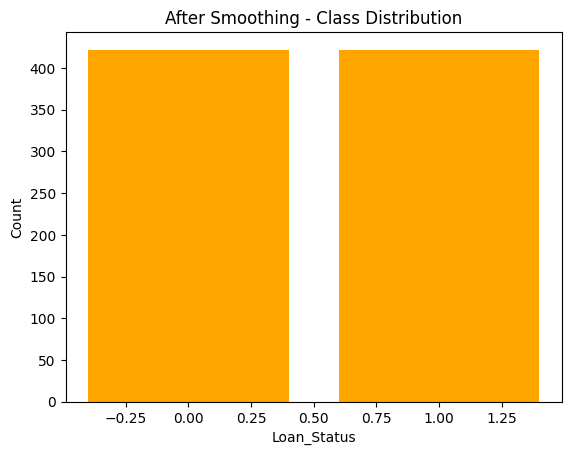

In [31]:
# Step 5: Check new class distribution after smoothing

from collections import Counter  # ← This line is required to count
print("After smoothing:", Counter(y_smoothed))

# Visualize after smoothing
plt.bar(Counter(y_smoothed).keys(), Counter(y_smoothed).values(), color='orange')
plt.title('After Smoothing - Class Distribution')
plt.xlabel('Loan_Status')
plt.ylabel('Count')
plt.show()

In [ ]:
FEATURE SCALLING

In [ ]:
# This ensure all the numerical columns are on the same scale (i.e 0 to 1), so that one column doesn't overshadow
# another the other, by shorting the distance btw column with large range so they can contribute equally . 
# We do feature scaling to make all features contribute equally to the model’s learning.

in my dataset what it will look like after feature scalling, so 
    
| Feature         | Original | After Scaling (0 to 1) |
| --------------- | -------- | ---------------------- |
| Income          | 5000     | 0.75                   |
| LoanAmount      | 150      | 0.60                   |
| Credit\_History | 1        | 1.0                    |


In [32]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1


In [ ]:
Performing feature scaling normalization to brings every value in the column into the range [0, 1]. To avoid domination
by large numbers, help models learn better.

In [94]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [95]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols] = st.fit_transform(X[cols])

In [40]:
# To view the feature scaling for the columns u selected
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,0.072991,-0.554487,-0.211241,0.273231,1.0,1
1,1,1,1,1,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0
2,1,1,0,1,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,1
3,1,1,0,0,0,-0.462062,0.251980,-0.306435,0.273231,1.0,1
4,1,0,0,1,0,0.097728,-0.554487,-0.056551,0.273231,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,-0.410130,-0.554487,-0.889500,0.273231,1.0,0
610,1,1,3,1,0,-0.212557,-0.554487,-1.258378,-2.522836,1.0,0
611,1,1,1,1,0,0.437174,-0.472404,1.276168,0.273231,1.0,1
612,1,1,2,1,0,0.357064,-0.554487,0.490816,0.273231,1.0,1


In [ ]:
SPLIT DATASET INTO TRAINING & TEST SET AND APPLY CROSS VALIDATION

In [ ]:
# I split my dataset into 5 parts. In each of 5 rounds, I train my model on 4 parts (80%) and test it on the 1 remaining part (20%).
After 5 rounds, I average all the test scores to get a stable, reliable score acrross all the model.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [42]:
model_df = {}
def model_val(model, X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Print accuracy
    print(f"{model.__class__.__name__} accuracy is: {accuracy_score(y_test, y_pred):.4f}")

    # Cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print(f"{model.__class__.__name__} average cross-val score is: {np.mean(score):.4f}")

    # Add to model_df
    model_df[model.__class__.__name__] = round(np.mean(score) * 100, 2)   

In [ ]:
LOGISTIC REGRESSION

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model, X, y)

LogisticRegression accuracy is: 0.7886
LogisticRegression average cross-val score is: 0.8062


In [ ]:
SVC

In [45]:
from sklearn.svm import SVC 
model = SVC()
model_val(model, X, y)

SVC accuracy is: 0.7805
SVC average cross-val score is: 0.8013


In [ ]:
DECISION TREE CLASSIFIER

In [46]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model, X, y)

DecisionTreeClassifier accuracy is: 0.7236
DecisionTreeClassifier average cross-val score is: 0.7183


In [ ]:
RANDOM FOREST CLASSIFIER

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model_val(model, X, y)

RandomForestClassifier accuracy is: 0.7724
RandomForestClassifier average cross-val score is: 0.7769


In [ ]:
GRADIENT BOOSTING CLASSIFIER

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model_val(model, X, y)

GradientBoostingClassifier accuracy is: 0.7724
GradientBoostingClassifier average cross-val score is: 0.7769


In [ ]:
FROM ALL THE CROSS VALIDATION, I HAVE DECIDED TO CHOSE AND GO WITH "Logistic Regression model" BECAUSE OF IT HIGH ACCURACY 
AND I WILL TRAINING THIS MODEL AND SAVING IT BELOW FOR MY NEW DATASET  

In [ ]:
CHOOSE AND CREATING THE BEST MODEL; Building a Logistic Regression model

In [43]:
# Defining each variables
X= df.drop('Loan_Status', axis=1)           # all columns except loan_status
Y= df['Loan_Status']                        # target column

In [44]:
# Train Logistic Regression model

log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
log_reg.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [45]:
# Save the trained model

import joblib
joblib.dump(log_reg, "logistic_model.pkl")
print("✅ Logistic Regression model saved as logistic_model.pkl")

✅ Logistic Regression model saved as logistic_model.pkl


In [ ]:
                                                     PHASE 2

In [79]:
#Load New or Test Dataset

df=pd.read_csv('./test.csv')

In [80]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [81]:
df.shape

(367, 12)

In [82]:
#Drop loan_ID
df = df.drop(columns=['Loan_ID'])

In [83]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [84]:
df.isnull().sum ()*100 / len(df)

Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

In [85]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [86]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [87]:
df.isnull().sum ()*100 / len(df)

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
dtype: float64

In [88]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0}).astype('int')
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
df['Married']=df['Married'].map({'Yes':1,'No':0}).astype('int')
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
df['Property_Area']=df['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')

In [89]:
# replace 3+ in the dependent column with 3, so as the make the column int value as other value in it for other analysis
if 'Dependents' in df.columns:
    df['Dependents'] = df['Dependents'].replace("3+", "3")
    df['Dependents'] = df['Dependents'].astype(int)

In [90]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,1


In [ ]:
Performing feature scaling normalization to brings every value in the column into the range [0, 1]. To avoid domination
by large numbers, help models learn better.

In [91]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [96]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
df[cols] = st.fit_transform(df[cols])

In [97]:
# To view the feature scaling for the columns u selected
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,0.186461,-0.673335,-0.426780,0.266022,1.0,1
1,1,1,1,1,0,-0.352692,-0.029848,-0.163953,0.266022,1.0,1
2,1,1,2,1,0,0.039641,0.098849,1.183033,0.266022,1.0,1
3,1,1,2,1,0,-0.502774,0.418877,-0.591047,0.266022,1.0,1
4,1,0,0,0,0,-0.311909,-0.673335,-0.952433,0.266022,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,-0.162439,0.088982,-0.377500,0.266022,1.0,1
363,1,1,0,1,0,-0.132056,-0.369180,-0.344647,0.266022,1.0,1
364,1,0,0,1,0,-0.317211,0.181644,-0.163953,0.266022,1.0,2
365,1,1,0,1,0,0.039641,0.353241,0.361700,0.266022,1.0,0


In [ ]:
Before predicting, make sure to pass only the feature columns (the same features you used in training) except the main
target excluded cus thats what would be predicted. Something like:

In [101]:
feature_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
                'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
                'Loan_Amount_Term', 'Credit_History', 'Property_Area']

X_new = df[feature_cols]   # no Loan_Status
df['Predicted_Loan_Status'] = model.predict(X_new)

In [104]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Predicted_Loan_Status'],
      dtype='object')


In [110]:
# Save the dataframe with predictions to CSV
output_file = "predicted_loan_status.csv"
df.to_csv(output_file, index=False)

print(f"✅ File saved as {output_file}")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns.tolist())

✅ File saved as predicted_loan_status.csv
Shape of dataset: (367, 12)
Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Predicted_Loan_Status']
